# Contents

<pre></pre>
<font size=+1>
    
[Import Data](#Import-Data)<pre></pre>
[Manipulating data](#Manipulating-date)<pre></pre>
[Merging Dataframes and Groupby](#Merging-Dataframes-and-Groupby)<pre></pre>
[Plots](#Plots)<pre></pre>
[Imputing Data](#Imputing-Data)<pre></pre>
[Modeling](#Modeling)<pre></pre>
[Dictionaries Example](#Dictionaries-Example)<pre></pre>
[API Requests](#API-Requests)<pre></pre>
[Classes and OOP](#Classes-and-OOP)<pre></pre>
</font>

## Import Data

[Go back to the Table of Contents](#Contents)

### Packages usually want to upload with display settings

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 1000)

### Upload data with encoding type and explicit column names

In [ ]:
df = pd.read_csv('Csv_File_Name.csv', encoding='Encoding_Type',  names = ['Index', 'Column'])

### Get basic Info

In [ ]:
df.info()

### Check type of data

In [ ]:
df.dtypes

### Get a list of column names

In [ ]:
df.columns

### Check values of a given column

In [ ]:
#Check for NA values, education has no missing values
df_clean['education'].value_counts()

### Change data type

In [ ]:
string_fips_sliced_df['Full FIPS'] = string_fips_sliced_df['Full FIPS'].astype(dtype = int)

### Count missing values

In [ ]:
df['Column_Name'].isna().sum()

In [ ]:
#This shows the percent missing values for each  varialble in a dataframe

DF_Percent_Missing = DF_Final_Vars.isna().mean().round(4)

#This shows the variables with highest missing percent missing values first

DF_Percent_Missing.sort_values(ascending=False)

### Changes all cells named 'Cell_ Value' to null values

In [ ]:
#Replace "unknown" values as missing

df = df_unclean.replace('unknown', np.NaN, inplace=True)

In [ ]:
#Now check counts of missing values
#We decided to drop contact and poutcome from our analysis

df_unclean.isna().sum()

## Manipulating data

### New column 1/1000th

In [ ]:
#In order to provide more manageable values, 'price was divided by 1000, 
# converting 'price' to thousands ($)
df['price1000'] = df['price']/1000

In [ ]:
#Creates new dataframe for all houses worth less than 1 million dollars

df_Mill = df.loc[df['price'] < 1000000]
df_Mill.describe()

In [ ]:
#If you have a list of column names you would like to keep (If there are many many variables)
#This creates a dataframe of the variables of interest

Final_DF = df[List_Of_Kept_Var_Names]

### Transform to string take slice

In [ ]:
#Get Target FIPs codes ready to merge
#data type needs to be string for manipulation
string_fips = TRI_df['FIPS'].astype(dtype = str)

#This reduces fips code to the block group level
string_fips_sliced = string_fips.str.slice(0,-3)

### Strip Text

In [ ]:
#This removes non numerical values from strings
#Cleaned strings are then assigned to float values

import re
string_money_df = string_money_df.applymap(lambda x: re.sub(r'[^a-zA-Z0-9 -]', '', str(x)))
string_money_df_cleaned = string_money_df.astype(dtype=float)
string_money_df_cleaned.head()

### Dropping Data

In [ ]:
#Drop contact and poutcome variables
df_clean.drop(df_clean[['contact', 'poutcome']], axis=1, inplace=True)

In [ ]:
#Drop rows that contain missing values in a specific column

adjusted_df = df['Column_With_Missing_Values'].dropna()

In [ ]:
#We identify the missing rows from the variable job
#these rows were dropped from the entire dataset
####Drops all missing rows from job
df_clean=df_unclean[df_unclean['job'].notnull()]

## Merging Dataframes and Groupby

[Go back to the Table of Contents](#Contents)

In [ ]:
#Combine multiple dataframes into one dataframe with side by side columns

Imputed_dataset = pd.concat([imputed_cat_df, imputed_int_df, imputed_numeric_df], axis=1)

In [ ]:
#Merging Two Dataframes

#This is dataframe includes target variable and all explanatory variables
df_merged = pd.merge(df1, df2,  how='left', left_on='GIDBG', right_index=True)

In [ ]:
#Groupby aggregate on multiple variables

#Aggregate vars of interest by merging column and chemical
#This gives chemical count for unique latitude and longitudes

unique_merging_df = vars_of_interest_df.groupby(['Merging_Column','30. CHEMICAL']).aggregate(sum)

In [ ]:
#This shows all variables in a dataframe that have a column name from a list
#Just another way of doing it

DF_Final_Vars.columns[DF_Final_Vars.columns.isin(cat_var_list)]

## Plots

### Barplot

In [1]:
import seaborn as sns
tips = sns.load_dataset("tips")
ax = sns.barplot(x="day", y="total_bill", data=tips)

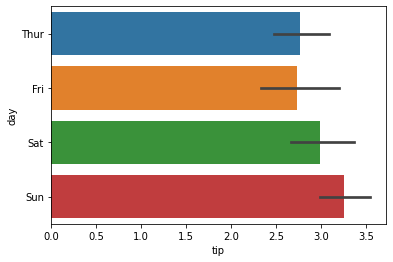

In [2]:
ax = sns.barplot(x="tip", y="day", data=tips)

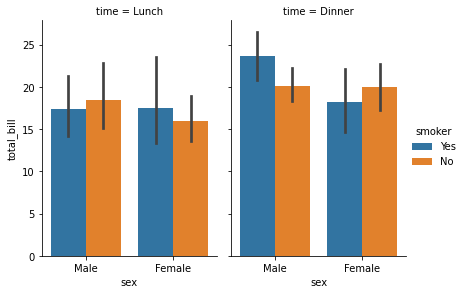

In [3]:
g = sns.catplot(x="sex", y="total_bill",
                hue="smoker", col="time",
                data=tips, kind="bar",
                height=4, aspect=.7);

### Histogram

Text(0.5, 0, 'Data')

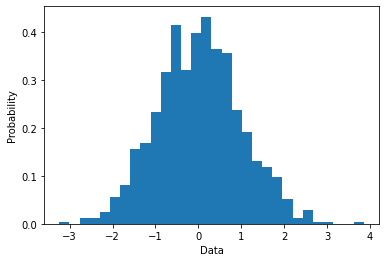

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(42)
x = np.random.normal(size=1000)
plt.hist(x, density=True, bins=30)  # `density=False` would make counts
plt.ylabel('Probability')
plt.xlabel('Data')

### Scatter Plot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


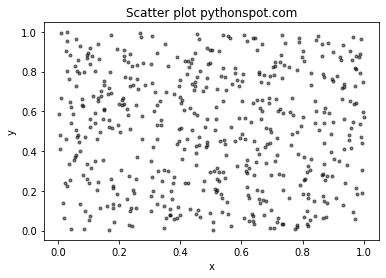

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create data
N = 500
x = np.random.rand(N)
y = np.random.rand(N)
colors = (0,0,0)
area = np.pi*3

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Box plot

Text(0.5, 1.0, 'blah')

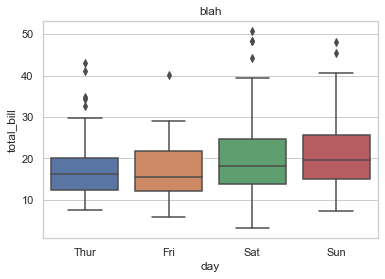

In [6]:
sns.set(style="whitegrid")
sns.boxplot(x=tips["day"],y=tips["total_bill"])
plt.title("blah")

### Correlation plot

<AxesSubplot:title={'center':'Variables of Interest in our Analysis'}>

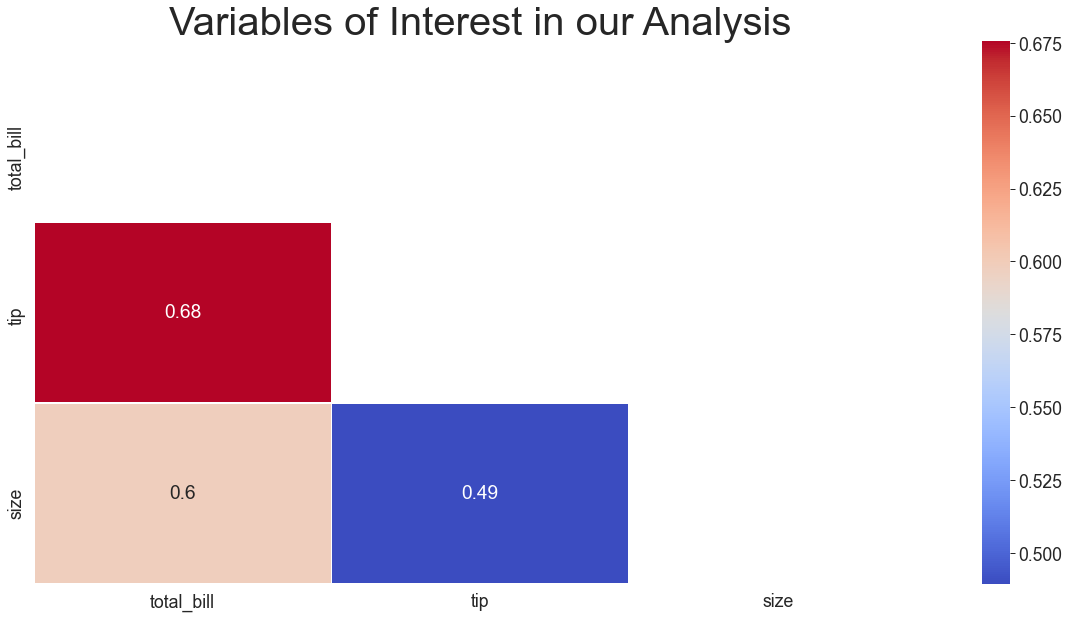

In [7]:
corr = tips.corr()
plt.figure(figsize=(20,10))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_context("paper", font_scale=2)
plt.title('Variables of Interest in our Analysis', fontsize=40)
sns.heatmap(tips.corr(),annot=True, linewidth=.5, cmap="coolwarm", mask=mask)

### Imputing Data

Quick Version

In [ ]:
#We identify the mode of the education variable
df_clean['education'].mode()

#We impute the missing values of education with its mode value
# fill missing values with mean column values
df_clean['education'].replace(to_replace = np.nan, value= 'whatever the mode is', inplace=True)

### Impute Categorical Variables

In [ ]:
#impute categorical variables

#This is to calculate median for strings
#Scipy for calculating mode
import scipy
from scipy import stats

#Loop
#I'm Here is to show if loop breaks
for i in range(0, len(cat_var_df.columns)):
        print('im here:', cat_var_df.columns[i])
        imputed_cat_df.iloc[:,i].replace(np.NaN, scipy.stats.mode(imputed_cat_df.iloc[:,i], axis=0, nan_policy='raise')[0][0], inplace=True)      
#impute mode for categorical vars

#check
imputed_cat_df.isna().sum()  

### Impute Integer Variables

In [ ]:
#impute median for integers
imputed_int_df = int_var_df
for i in range(0, len(int_var_df.columns)):
        imputed_int_df.iloc[:,i].replace(np.NaN, imputed_int_df.iloc[:,i].median(), inplace=True)
        
#check
imputed_int_df.isna().sum() 

### Impute numerical variables

In [ ]:
#impute mean for numerical vars
imputed_numeric_df = numeric_var_df
for i in range(0, len(numeric_var_df.columns)):
        print('im here:', numeric_var_df.columns[i])
        imputed_numeric_df.iloc[:,i].replace(np.NaN, imputed_numeric_df.iloc[:,i].mean(), inplace=True)
        
##Imputed numerical dataframe

#check
imputed_numeric_df.isna().sum()  

### One hot encoding

In [ ]:
#Get one hot encoded values for independent categorical variables
#merge one hot encoded variables with independent numeric variables

X_enc = pd.get_dummies(df_clean[['marital', 'job', 'education', 'default', 'housing', 'loan', 'y']], drop_first= True)

numeric_data = df_clean[['age', 'balance', 'duration', 'campaign', 'previous']]
    
cleaned_data_merge = pd.merge(numeric_data, X_enc, how = 'left', left_index=True, right_index=True)

### Scale Data StandardScalar
Not needed for logistic regression

In [9]:
import pandas as pd

cleaned_data_x = pd.read_csv('cleaned_X.csv')
cleaned_data_x.drop('Unnamed: 0', 1, inplace=True)
cleaned_data_y=pd.read_csv('cleaned_Y.csv')
cleaned_data_y.drop('Unnamed: 0', 1, inplace=True)
cleaned_data_y.head()

,y_yes
0,0
1,0
2,0
3,0
4,0


In [10]:
#Split data into dependent and independent variables

#cleaned_data_x = cleaned_data_merge.iloc[:,:-1]
#cleaned_data_x
#cleaned_data_y = cleaned_data_merge.iloc [:,-1:]
#cleaned_data_x.head(2)

In [11]:
#Check missing values for independent variables
cleaned_data_x.isna().sum()

age                    0
balance                0
duration               0
campaign               0
previous               0
marital_married        0
marital_single         0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
education_secondary    0
education_tertiary     0
default_yes            0
housing_yes            0
loan_yes               0
dtype: int64

In [12]:
#Split Data into training and testing groups
#We will have to standardize the numeric independent variables
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(cleaned_data_x, cleaned_data_y, test_size=0.1, random_state= 1254)

In [13]:
#Isolate training numeric independent variables
x_train_numeric = x_train.iloc[:,:5]


#Isolate tersting numeric independent variables
x_test_numeric = x_test.iloc[:,:5]

In [14]:
#Apply standard scalar
#Not Needed fo logistic Regression
import sklearn
from sklearn.preprocessing import StandardScaler

scalar = sklearn.preprocessing.StandardScaler()

scalar_x_train_numeric = pd.DataFrame(scalar.fit_transform(x_train_numeric), index =x_train_numeric.index, columns=x_train_numeric.columns[0:5], )
scalar_x_test_numeric = pd.DataFrame(scalar.transform(x_test_numeric), index = x_test_numeric.index, columns=x_test_numeric.columns[0:5])

In [15]:
x_train

,age,balance,duration,campaign,previous,marital_married,marital_single,job_blue-collar,job_entrepreneur,job_housemaid,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes
28901,46,587,186,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12626,38,2220,87,2,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
44548,33,889,13,1,6,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
20561,46,111,78,2,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2809,35,51,824,2,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2268,45,27,299,5,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1471,33,0,345,2,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
29468,53,483,288,3,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
442,51,228,136,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
33374,43,2374,316,2,2,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [16]:
#Merge standardized numerical independent variables with categorical independent variables
x_train_complete = pd.merge(scalar_x_train_numeric, x_train.iloc[:,5:], how = 'left', left_index=True, right_index=True)
x_test_complete = pd.merge(scalar_x_test_numeric, x_test.iloc[:,5:], how = 'left', left_index=True, right_index=True)

In [17]:
#Check x training data
x_train_complete.head(3)

,age,balance,duration,campaign,previous,marital_married,marital_single,job_blue-collar,job_entrepreneur,job_housemaid,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes
28901,0.481107,-0.255399,-0.281311,-0.566541,-0.248662,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12626,-0.272390,0.279103,-0.664779,-0.245122,-0.248662,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
44548,-0.743326,-0.156551,-0.951412,-0.566541,2.312930,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


## Modeling

## Logistic Regression Example
[Go back to the Table of Contents](#Contents)

In [18]:
#Begin fitting regression model
import statsmodels.api as sm
import sklearn.linear_model 
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = sm.Logit(y_train,x_train)
result=logmodel.fit()
print(result.summary())
## P values greater than .05 are not significant

Optimization terminated successfully.
         Current function value: 0.279710
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  y_yes   No. Observations:                40430
Model:                          Logit   Df Residuals:                    40408
Method:                           MLE   Df Model:                           21
Date:                Sat, 26 Dec 2020   Pseudo R-squ.:                  0.2278
Time:                        11:40:16   Log-Likelihood:                -11309.
converged:                       True   LL-Null:                       -14645.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.0287      0.001    -19.896      0.000      -0.032      -0.026
ba

In [23]:
##Drop insignificant variables
x_train.columns
x_train.drop(['marital_single','job_entrepreneur','job_housemaid','job_management','job_retired',
             #'job_self-employed','job_services','job_student','job_unemployed','education_tertiary','default_yes'], 1, inplace=True)
x_test.drop(['marital_single','job_entrepreneur','job_housemaid','job_management','job_retired',
             'job_self-employed','job_services','job_student','job_unemployed','education_tertiary','default_yes'], 1, inplace=True)

/Users/Mango/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
#Begin fitting regression model
import statsmodels.api as sm
import sklearn.linear_model 
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = LogisticRegression()
sk_res = logmodel.fit(x_train, y_train)
sk_predictions = logmodel.predict(x_test)

/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Cross Validation

### Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, sk_predictions)
cm

array([[3913,   82],
       [ 408,   90]])

In [26]:
#This creates confusion matrix visualization

import matplotlib.pylab as plt
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes, normalize=False):
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.cividis_r)
    plt.title('Confusion matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

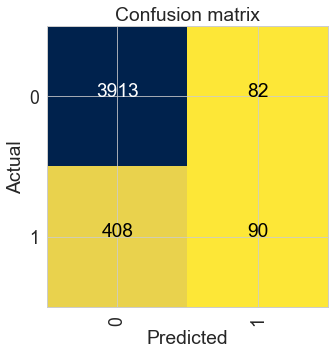

In [27]:
plot_confusion_matrix(cm, classes=['0','1'], normalize=False)

In [28]:
##Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, sk_predictions)

0.8909414645003338

In [29]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, fscore, support = precision_recall_fscore_support(y_test, sk_predictions, average='macro')

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: 0.7144166132947262
recall: 0.5800986172474629
fscore: 0.6048670787476758
support: None


In [30]:
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
# predictions
rfc_predict = rfc.predict(x_test)

/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Mango/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [31]:
cm2 = confusion_matrix(y_test, rfc_predict)
cm2

array([[3861,  134],
       [ 357,  141]])

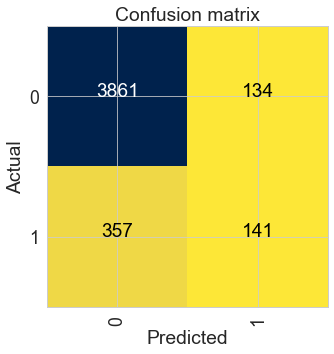

In [32]:
plot_confusion_matrix(cm2, classes=['0','1'], normalize=False)

In [33]:
##Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, rfc_predict)

0.8907188960605387

In [34]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, fscore, support = precision_recall_fscore_support(y_test, rfc_predict, average='macro')

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: 0.7140450019397387
recall: 0.6247953013556102
fscore: 0.6525145743606239
support: None


## Dictionaries Example
[Go back to the Table of Contents](#Contents)

In [ ]:
#Make a pizza input and dictionary
p = int (input ("Enter the no. of pizzas you want to buy (max 3): "))
t = int (input ("Enter the toppings you would like in each pizza (max 4): "))
b = 1
dict_pizza = {}
for _ in range(p):
    pizza = ""
    pizza = str(input(f"\nEnter the flavor of Pizza No. {b}: "))
    dict_pizza[pizza] = []
    b += 1
    c = 1
    for _ in range(t):    
        topping = str(input(f"Enter the flavor of Topping No. {c}: "))
        dict_pizza[pizza].append(topping)
        c += 1
        
print(dict_pizza)

In [ ]:
#Final
#Here is what your program would look like with all the changes

import os

available_pizzas = ['margarita', 'pollo', '4cheese', 'bolognese', 'vegetarian']
available_toppings = ['mushroom', 'onions', 'green pepper', 'extra cheese']
pizza_prices = {'margarita': 5, 'pollo': 7, '4cheese': 6, 'bolognese': 8, 'vegetarian': 6.5}
topping_prices = {'mushroom':1, 'onions': 2, 'green pepper':3, 'extra cheese':4}

def ShowMenu():
    os.system('cls')
    print("Available Pizzas:\n")
    print(*available_pizzas,sep = ', ')
    print("\n\nAvailable Topings:\n")
    print(*available_toppings,sep = ', ')
    print('\n\n')

def TakeOrderInput():
    os.system('cls')
    print("Hi, welcome to our text based pizza ordering")
    ordering = True
    while ordering:
        os.system('cls')
        ShowMenu()
        pizza = input("Please choose a pizza: ")
        if pizza not in available_pizzas:
            print(f"I am sorry, we currently do not have {pizza}\n.")
            os.system('pause')
            continue
        topping = input("Please choose a topping: ")
        if topping not in available_toppings:
            print(f"I am sorry, we currently do not have {topping}\n.")
            os.system('pause')
            continue

        print(f"Final order: {pizza} with topping {topping}: ")
        ordering = False

    return pizza,topping

class Order:
    def __init__(self):
        taxes = 0 #You can add taxes
        pizza,topping = TakeOrderInput()
        self.type = pizza
        self.topping = topping
        self.PizzaPrice = pizza_prices[pizza]
        self.ToppingPrice = topping_prices[topping]
        self.Total = self.PizzaPrice + self.ToppingPrice


choice = True
orders = []
orderchoice = input("Welcome! Would you like to order ? (y/n): ")
if orderchoice == 'n':
    print("Have a nice day!")
else:
    while choice:
        neworder = Order()
        orders.append(neworder)
        newchoice = input("Would you like to order again? (y/n): ")
        if (newchoice) == 'n':
            break

total = 0
for order in orders:
    total+=order.Total

print("Total: ",total, '$')

## Classes and OOP
[Go back to the Table of Contents](#Contents)

In [ ]:
class Student(object):
    def __init__(self, name, age, gender, level, grades=None):
        self.name = name
        self.age = age
        self.gender = gender
        self.level = level
        self.grades = grades or {}

    def setGrade(self, course, grade):
        self.grades[course] = grade

    def getGrade(self, course):
        return self.grades[course]

    def getGPA(self):
        return sum(self.grades.values())/len(self.grades)

# Define some students
john = Student("John", 12, "male", 6, {"math":3.3})
jane = Student("Jane", 12, "female", 6, {"math":3.5})

# Now we can get to the grades easily
print(john.getGPA())
print(jane.getGPA())

In [ ]:
#Class Inheritance

# parent class
class Bird:
    
    def __init__(self):
        print("Bird is ready")

    def whoisThis(self):
        print("Bird")

    def swim(self):
        print("Swim faster")

# child class
class Penguin(Bird):

    def __init__(self):
        # call super() function
        super().__init__()
        print("Penguin is ready")

    def whoisThis(self):
        print("Penguin")

    def run(self):
        print("Run faster")

peggy = Penguin()
peggy.whoisThis()
peggy.swim()
peggy.run()

In [ ]:
def main():
    '''
    Creating Dictionaries with string as key and int as value
    '''                                  
    wordFrequency = {
        "Hello" : 7,
        "hi" : 10,
        "there" : 45,
        "at" : 23,
        "this" : 77
        }
    '''
    Iterate over the dictionary using for loop
    '''
    for key in wordFrequency:
        value = wordFrequency[key]
        print(key, " :: ", value)
    
    print("**************")    
    
    '''
    Iterate over the dictionary using items()
    '''    
    for key , value in wordFrequency.items():
        print(key, " :: ", value)    
    # Take a dictionary view 
    dictView =  wordFrequency.items()
    
    print("Dictionary View before modification : ", dictView, sep ="\n")
    
    # Modify the dictionary
    wordFrequency["hi"] = 90
    
    print("Dictionary View after modification : ", dictView, sep ="\n")
        
if __name__ == "__main__":
    main()

## API Requests
[Go back to the Table of Contents](#Contents)

In [ ]:
#Pull request from an API example

import requests

url = 'https://geo.fcc.gov/api/census/block/find'
parameters = {"lat": latitude_longitude_df['12. LATITUDE'][0], "lon": latitude_longitude_df['13. LONGITUDE'][0], 'showall':'false'}
req = requests.get(url, parameters)

print(req.status_code)
print(req.headers)
print(req.text)

In [ ]:
#This loop Will pull requests for any set of latitudes and longitudes
#Change the length of the loop to go through an entire dataframe
#This loop saves a file every 5000 requests
#File Names will be labeled like this'FIPs' + '_' + str(count) + '.csv'
#Files are updated and overwritten every time the loop is run
#If there is an error in the loop SAVE PROGRESS TO A DIFFERENT FILE NAME

import requests
import datetime

latitude_list = []
longitude_list = []
fips_code_list = []
timestamps_list = []
count = 0 
url = 'https://geo.fcc.gov/api/census/block/find'
for i in range(0, 5000):
    parameters = {"lat": latitude_longitude_df['12. LATITUDE'][i], "lon": latitude_longitude_df['13. LONGITUDE'][i], 'showall':'false'}
    try:
        response = requests.get(url, parameters)
        data = response.json()        
        latitude_list.append(latitude_longitude_df['12. LATITUDE'][i])
        longitude_list.append(latitude_longitude_df['13. LONGITUDE'][i])
        fips_code_list.append(data['results'][0]['block_fips'])
        timestamps_list.append(datetime.datetime.utcnow())
    except:
        print('Error at index:', i)
        fips_code_list.append('Error')
    if ((len(fips_code_list) % 5000) == 0):
        FIPs_API_df = pd.DataFrame({'Latitude': latitude_list, 'Longitude': longitude_list, 'FIPS': fips_code_list, 'API_Time': timestamps_list})
        pd.DataFrame.to_csv(FIPs_API_df, 'FIPs' + '_' + str(count) + '.csv')
        count += 1
        
FIPs_API_df = pd.DataFrame({'Latitude': latitude_list, 'Longitude': longitude_list, 'FIPS': fips_code_list, 'API_Time': timestamps_list})
FIPs_API_df.head()